This assignment will use what I have learnt in the Fintech Boot Camp so far, to evaluate the performance of algorithmic, hedge and mutual funds and compare these against the S & P 500 index. For the purpose of this assignment, I have assumed my custom portfolio scrips are mutual funds.

Coding standards: The variable names generally reflect their purpose. Note "combined" and "total" are used for concatenated dataframes. As a rule, have commented at each relevant step what the code is attempting to achieve.

Steps:
# ORIGINAL PORTFOLIO
1. Import the files using pandas
2. Cleanse the files for null values and fix data issues 
3. Calculate the daily returns for S & P 500 index- daily returns for others already provided
4. Create a dataframe for the returns (Whale returns, Algorithmic returns and S & P 500 returns)
5. Conduct performance analysis for all the portfolios- plot graphs
6. Conduct risk analysis for all the portfolio- calculate standard deviation
7. Calculate Rolling Statistics, correlation and beta to compare across portfolio performance and volatility
8. Calculate Sharpe ratios to compare portfolio returns over time

# CUSTOM PORTFOLIO
9. Create a custom portfolio
10. Calculate the weighted returns for the custom portfolio
11. Create a dataframe to combine original portfolio and custom portfolio
12. Compare custom portfolio returns with other portfolio- standard deviation and rolling std
13. Conduct risk analysis of custom portfolio- calculate correlation/ beta
14. Analyse custom portfolio performance using Sharpe ratios

In [2]:
#1. IMPORT CSV FILES USING PANDAS- whale_returns.csv, algo_returns_csv and sp500_history.csv
import pandas as pd
from pathlib import Path
%matplotlib inline
import numpy as np
# Read whale_returns.csv
whale_returns_csv = Path('c:/Users/User/Documents/Renu/Homework03/whale_returns.csv')
whale_returns = pd.read_csv(whale_returns_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()
# Read algo_returns.csv
algo_returns_csv = Path('c:/Users/User/Documents/Renu/Homework03/algo_returns.csv')
algo_returns = pd.read_csv(algo_returns_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head()
# Read sp500_history.csv
sp500_history_csv = Path('c:/Users/User/Documents/Renu/Homework03/sp500_history.csv')
sp500_history = pd.read_csv(sp500_history_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
sp500_history.sort_index(ascending = True, inplace = True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [6]:
#2. CLEANSE THE DATA- whale_returns, algo_returns and sp500_history
#detect null values whale_returns
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
#detect null values algo_returns
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
#detect null values sp500_history
sp500_history.isnull().sum()

Close    0
dtype: int64

In [9]:
# drop nulls in whale_returns and reconfirm
whale_ret_clean = whale_returns.dropna()
whale_ret_clean.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [12]:
# drop nulls in algo_returns and reconfirm
algo_ret_clean = algo_returns.dropna()
algo_ret_clean.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [11]:
# Cleanse S & P 500 data- sp500_history
# Check data types
sp500_history.describe(include= 'all')
sp500_history.dtypes

Close    object
dtype: object

In [13]:
# fix data types in S & P 500- sp500_history
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '', regex = True).astype('float')
sp500_history.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [14]:
#3. Calculate the daily returns for S & P 500 index- sp500_history, drop nulls and rename "Close"column specific to this portfolio
sp500_dailyreturns = sp500_history.pct_change()
sp500_dailyreturns.isnull().sum()
sp500_dailyreturns.dropna()
sp500_column = ["SP500"]
sp500_dailyreturns.columns = sp500_column
sp500_dailyreturns.dropna(inplace = True)
sp500_dailyreturns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [15]:
#4. Create a dataframe for the returns (Whale returns- whale_ret_clean, Algorithimic- algo_ret_clean snd S & P 500 returns- sp500_dailyreturns)
combinedret_df = pd.concat([whale_ret_clean,algo_ret_clean,sp500_dailyreturns], axis ="columns", join = 'inner')
combinedret_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


<AxesSubplot:xlabel='Date'>

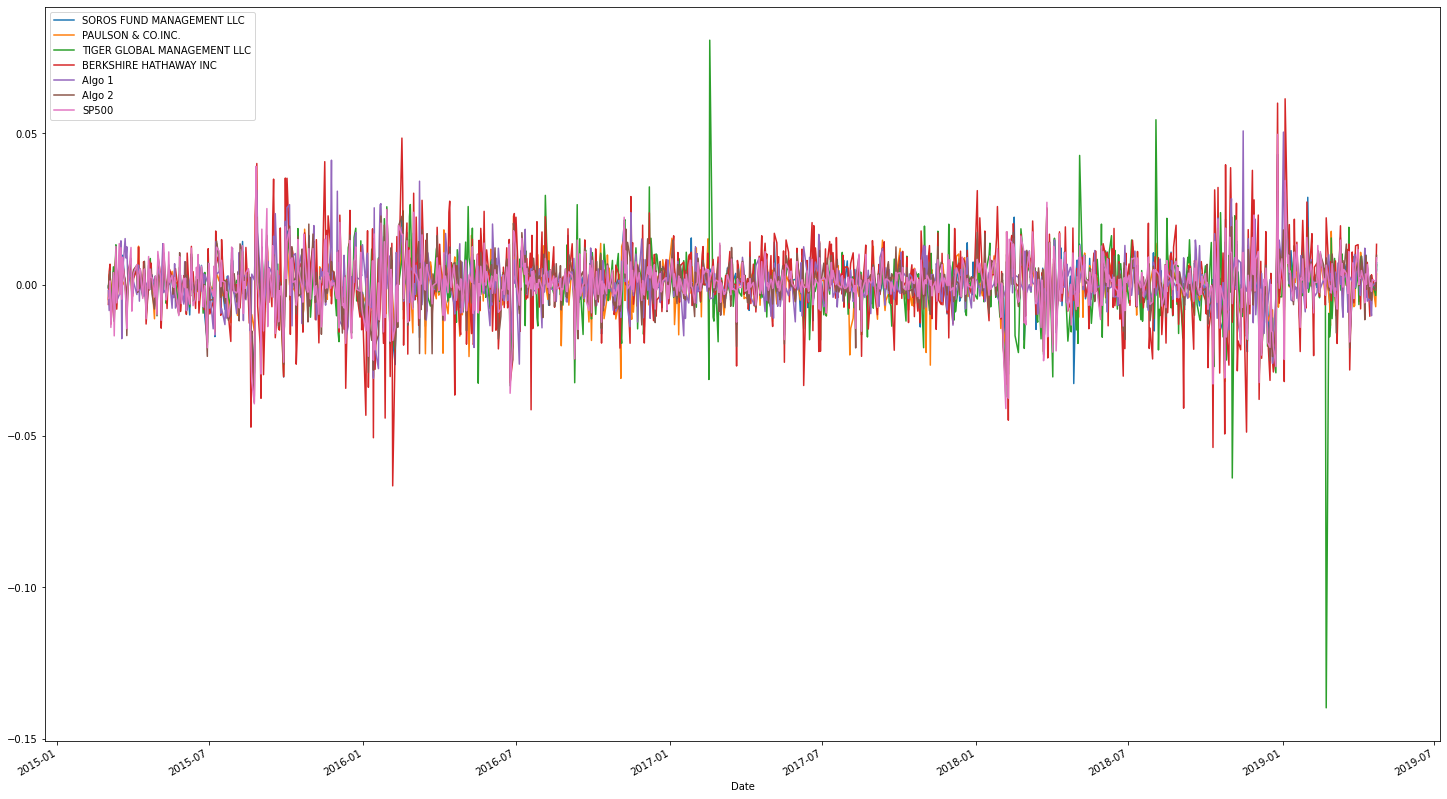

In [16]:
#5. Conduct performance analysis of the combined portfolio- combinedret_df
# calculate and plot daily returns of all portfolios
combinedret_df.plot(figsize = (25, 15))
# Note that Tiger Global seems to have quite a few spikes aka seems volatile

<AxesSubplot:xlabel='Date'>

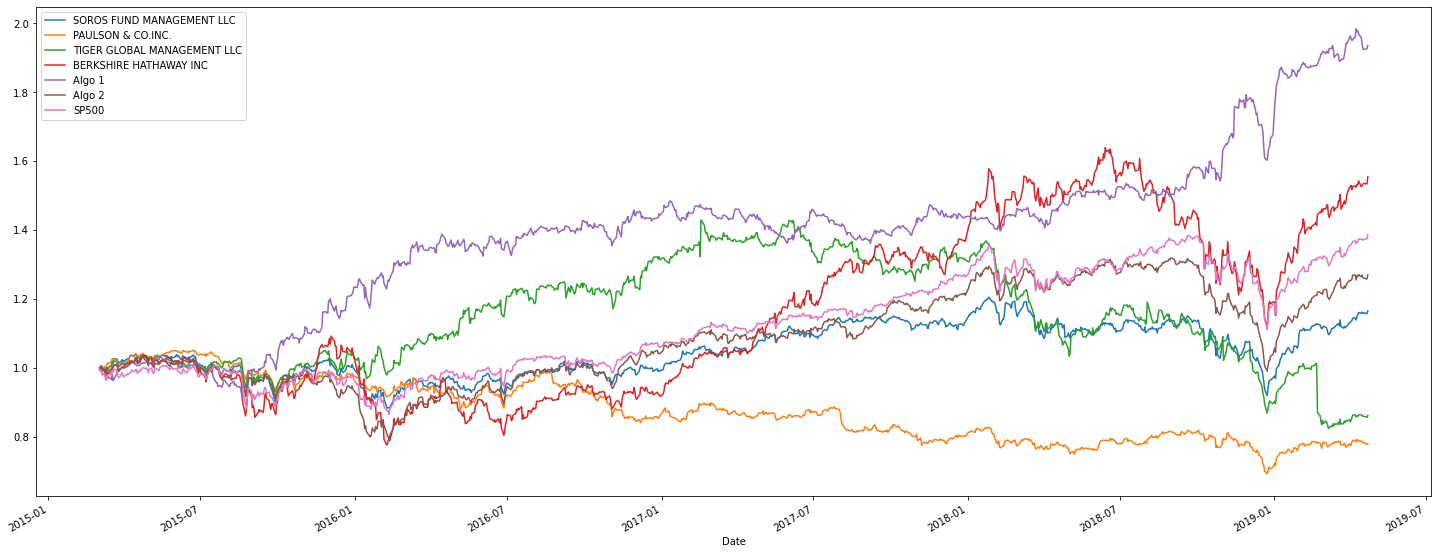

In [17]:
# calculate and plot cumulative returns of all portfolios
cumret_df = (1+combinedret_df).cumprod()
cumret_df.plot(figsize = (25,10))
# Note: Algo 1 and Berkshire Hathaway generally outperform the S & P 500.

<AxesSubplot:>

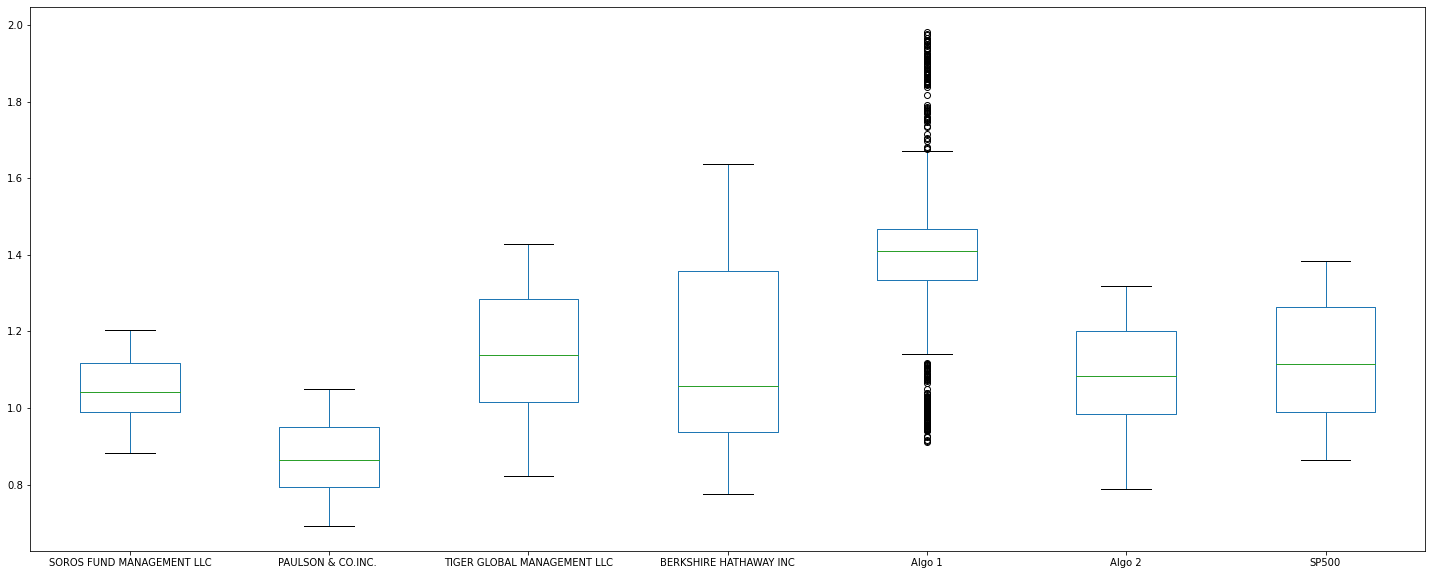

In [18]:
#6. Conduct risk analysis- cumret_df
# Create a box plot for each of the returns
cumret_df.plot(kind='box', figsize = (25,10))

In [19]:
# Calculate the standard deviation for the portfolio as a comparison to the same base mean is required
#Note: The portfolios that have the largest standard deviation values from that of S & P 500 are the riskiest aka Tiger Global and Berkshire Hathawa
#Calculate the standard deviation for the combined portfolio
combinedret_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

In [20]:
# To determine which portfolio is riskier we can plot the distribution curve for the three portfolios
# Calculate the daily standard deviation of S & P 500
sp500_ret_std = sp500_dailyreturns.std()
sp500_ret_std

SP500    0.008111
dtype: float64

In [21]:
algo_ret_std = algo_ret_clean.std()
algo_ret_std

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [23]:
whale_ret_std = whale_ret_clean.std()
whale_ret_std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

<AxesSubplot:ylabel='Frequency'>

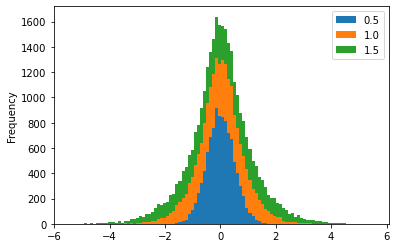

In [24]:
#Calculate which portfolios are riskier than the S & P 500
whale_ret_std = np.random.normal(scale=0.5, size=10000)
algo_ret_std = np.random.normal(scale=1.0, size=10000)
sp500_ret_std = np.random.normal(scale=1.5, size=10000)
total_portfolio_std = pd.DataFrame({
    "0.5": whale_ret_std,
    "1.0": algo_ret_std,
    "1.5": sp500_ret_std
})

total_portfolio_std.plot.hist(stacked=True, bins=100)

In [27]:
# Calculate the annualised standard deviation for combined portfolio
combinedret_df.std()*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

<AxesSubplot:title={'center':'Rolling 21 day standard deviation'}, xlabel='Date'>

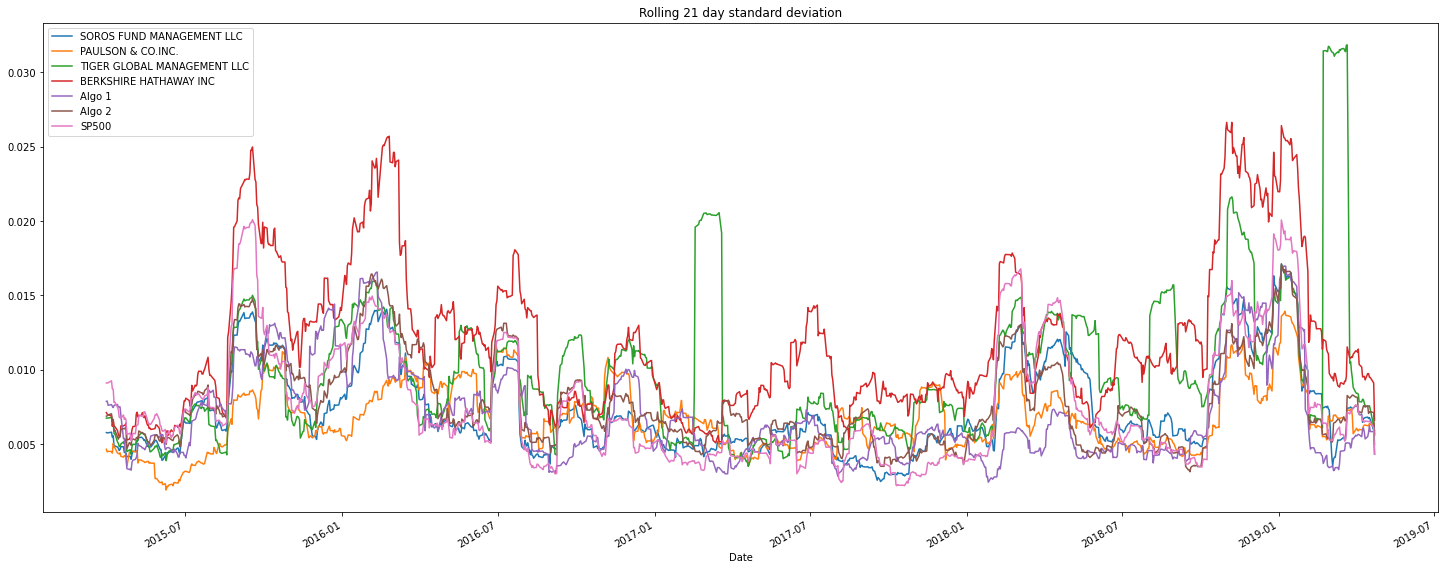

In [26]:
#7. Calculate Rolling Statistics for combined portfolio
roll21stats = combinedret_df.rolling(window = 21).std()
roll21stats.tail(25)# to reconfirm
roll21stats.plot(figsize = (25,10), title = 'Rolling 21 day standard deviation')

In [28]:
# Calculate the corelation
combinedret_cor = combinedret_df.corr()
combinedret_cor.head(7)
#Note: Based on below matrix Algo 2 best mimicks the S & P 500- highest corelation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:title={'center':'Rolling 21 day Beta of Algo 2'}, xlabel='Date'>

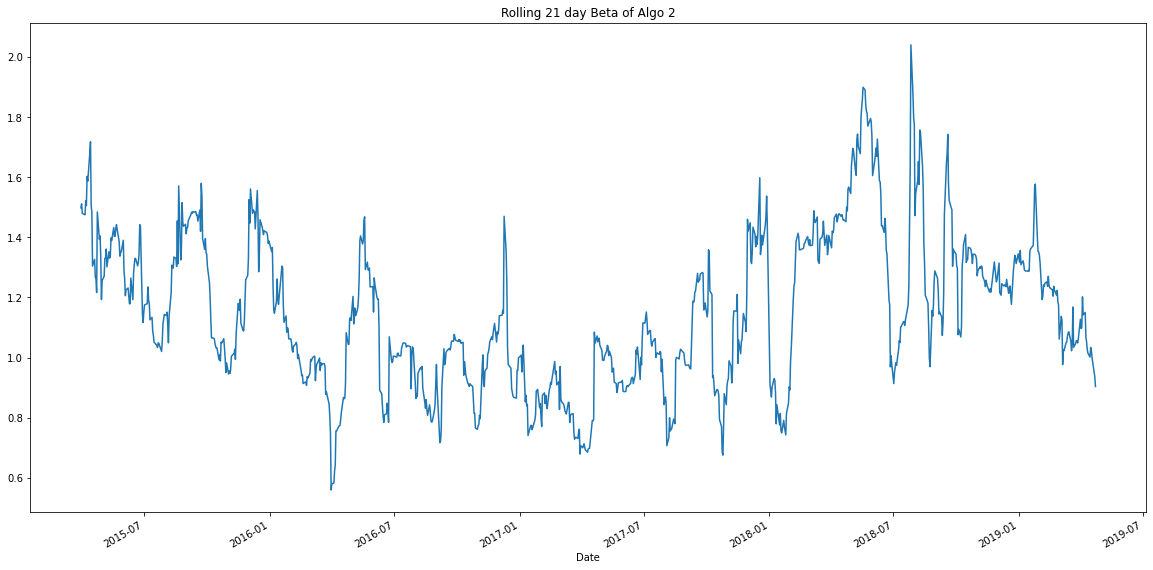

In [29]:
#Calculate and plot the 21 day rolling beta for a chosen portfolio and the S & P 500
covariance_Algo2_21 = combinedret_df['Algo 2'].rolling(window = 21).cov(combinedret_df['SP500'])
variance_21 = combinedret_df['SP500'].rolling(window = 21).var()
beta_algo2_21 = variance_21 / covariance_Algo2_21
beta_algo2_21.plot(figsize = (20,10), title = 'Rolling 21 day Beta of Algo 2')
#Note: Algo 2 seems to be valatile as its Beta is generally > 1

In [30]:
# Calculate the Exponentially Weighted Average with a 21 day half life
combinedret_df.ewm(span=21,min_periods=0,adjust=False,ignore_na=False).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,-0.000948,-0.004233,-0.000681,-0.005589,-0.002546,-0.000644,-0.004525
2015-03-05,-0.000496,-0.003478,-0.000405,-0.004469,-0.002402,-0.000192,-0.004005
2015-03-06,-0.001170,-0.003486,-0.001139,-0.005253,-0.002634,-0.001216,-0.004929
2015-03-09,-0.001011,-0.002785,-0.000504,-0.004926,-0.002890,-0.000987,-0.004123
...,...,...,...,...,...,...,...
2019-04-16,0.002021,0.000516,0.000721,0.001277,0.000012,0.001271,0.001544
2019-04-17,0.001574,-0.000119,0.000255,0.001454,-0.000926,0.000680,0.001197
2019-04-18,0.001563,0.000003,0.000285,0.001496,-0.000895,0.000507,0.001232


In [31]:
# 8. Calculate annualised Sharpe ratios
combined_sharpe = combinedret_df.mean()*252/(combinedret_df.std()*np.sqrt(252))
combined_sharpe

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe ratios for the portfolio'}>

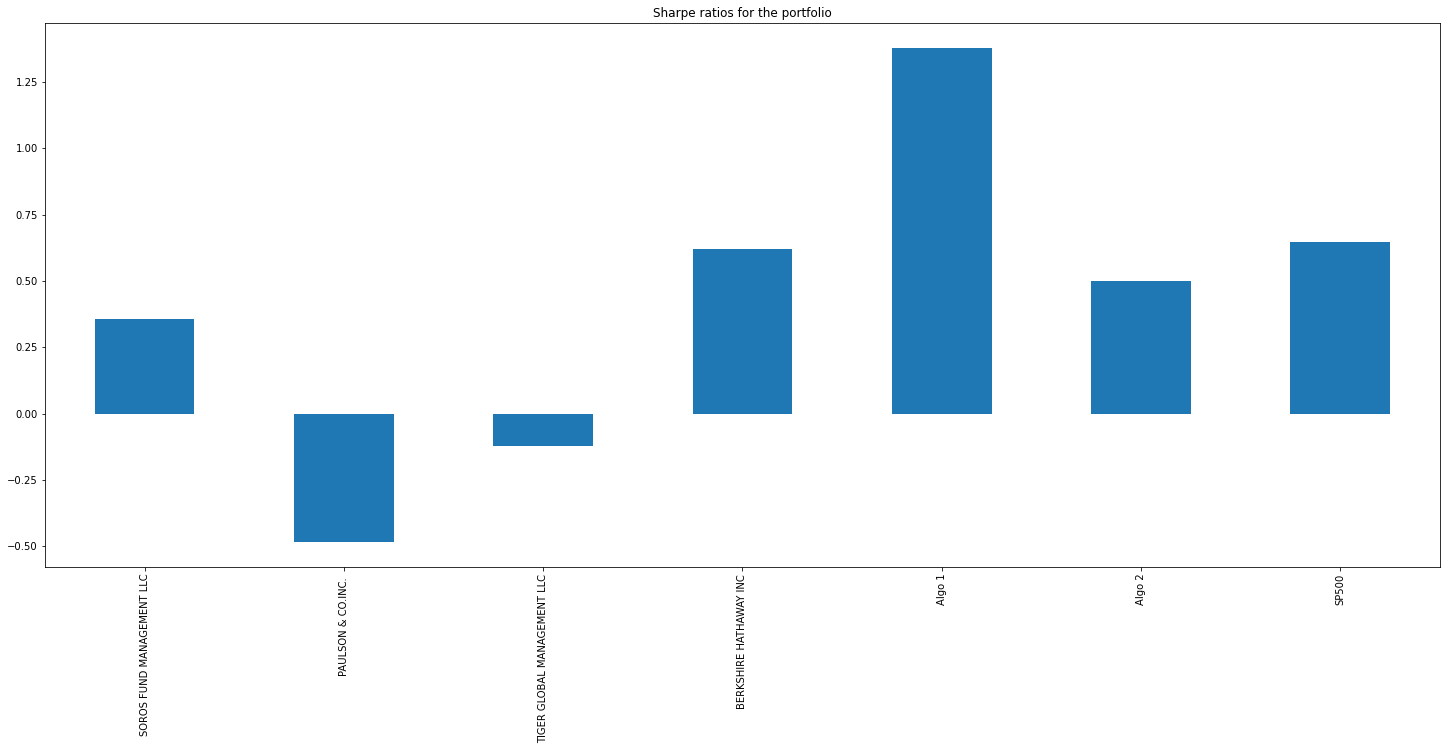

In [32]:
combined_sharpe.plot(kind = 'bar', figsize = (25, 10), title = 'Sharpe ratios for the portfolio')
#Note: Based on below, Algo 1 has definitely outperformed the market and whales portfolio but the same cannot be said of Algo 2

# CUSTOM PORTFOLIO- Assumed that the scrips selected are mutual funds and data set used is 2018/19 as this represents a comparitive period.
9. Create a custom portfolio
10. Calculate the weighted returns for the custom portfolio
11. Create a dataframe to combine original portfolio returns and custom portfolio returns
12. Compare custom portfolio returns with original portfolio returns- standard deviation and rolling std
13. Conduct risk analysis of a custom portfolio scrip to S & P 500- calculate correlation/ beta
14. Analyse custom portfolio performance using Sharpe ratios

In [35]:
#9. Create a custom portfolio (BHP, WOW, CBA and VEA)
# Read files containing closing prices for last 1 year. Note that the year selected is 208/19 to match data set of original portfolio range
# Remove the extra columns and retain only the adjusted value for each scrip
# Create a single datafrmae to analyse all the scrips and calculate the daily returns
import pandas as pd
from pathlib import Path
#read files and renmae columns
bhp_csv = Path('c:/Users/User/Documents/Renu/Homework03/BHP.AX.csv')
bhp_prices = pd.read_csv(bhp_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
bhp_prices.sort_index(ascending = True, inplace = True)
bhp_prices.drop(columns=['BHP Open', 'BHP High', 'BHP Low', 'BHP Close','BHP Volume'], inplace=True)
bhp_prices.rename(columns = {"BHP Adj Close":"BHP"}, inplace = True)
#bhp_prices.head(10)
cba_csv = Path('c:/Users/User/Documents/Renu/Homework03/CBA.AX.csv')
cba_prices = pd.read_csv(cba_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
cba_prices.sort_index(ascending = True, inplace = True)
cba_prices.drop(columns=['CBA Open', 'CBA High', 'CBA Low', 'CBA Close','CBA Volume'], inplace=True)
cba_prices.rename(columns = {"CBA Adj Close":"CBA"}, inplace = True)
cba_prices.head(10)
vea_csv = Path('c:/Users/User/Documents/Renu/Homework03/VEA.AX.csv')
vea_prices = pd.read_csv(vea_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
vea_prices.sort_index(ascending = True, inplace = True)
vea_prices.drop(columns=['VEA Open', 'VEA High', 'VEA Low', 'VEA Close','VEA Volume'], inplace=True)
vea_prices.rename(columns = {"VEA Adj Close":"VEA"}, inplace = True)
#vea_prices.head(10)
wow_csv = Path('c:/Users/User/Documents/Renu/Homework03/WOW.AX.csv')
wow_prices = pd.read_csv(wow_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
wow_prices.sort_index(ascending = True, inplace = True)
wow_prices.drop(columns=['WOW Open', 'WOW High', 'WOW Low', 'WOW Close','WOW Volume'], inplace=True)
wow_prices.rename(columns = {"WOW Adj Close":"WOW"}, inplace = True)
wow_prices.head(10)
my_portfolio = pd.concat([bhp_prices, cba_prices,vea_prices, wow_prices], axis = 'columns', join = 'inner')
my_portfolio.index = my_portfolio.index.normalize()
my_portfolio.dropna()
#my_portfolio.head(10)
# my portfolio return
my_portfolio_ret = my_portfolio.pct_change() # without weights
#my_portfolio_ret.head(10)
my_portfolio_ret.dropna(inplace = True)
my_portfolio_ret.head(10)

,BHP,CBA,VEA,WOW
Date,,,,
2018-09-04,0.002121,-0.006741,-0.025751,-0.000702
2018-09-05,-0.026602,-0.008766,0.004405,-0.003511
2018-09-06,0.001786,0.000428,-0.008772,-0.004933
2018-09-07,-0.003185,0.005275,-0.026549,0.001771
2018-09-10,-0.003195,0.003404,-0.013636,-0.001768
2018-09-11,0.000000,0.015831,0.073733,0.010623
2018-09-12,-0.003205,0.000835,0.021459,-0.004205
2018-09-13,0.006752,-0.010427,-0.004202,-0.028955
2018-09-14,0.016289,0.004496,0.008439,-0.003273


In [36]:
# 10. Calculate weighted average returns for the portfolio assuming an equal weight for each share in portfolio i.e. 1/4
weights = [1/4, 1/4, 1/4, 1/4]
weighted_portfolio= my_portfolio.dot(weights)
weighted_portfolio_ret = weighted_portfolio.pct_change()
weighted_portfolio_ret.dropna(inplace = True)
weighted_portfolio_ret.head(10)

Date
2018-09-04   -0.003863
2018-09-05   -0.011220
2018-09-06   -0.000692
2018-09-07    0.001973
2018-09-10    0.000461
2018-09-11    0.012440
2018-09-12   -0.000709
2018-09-13   -0.010807
2018-09-14    0.005414
2018-09-17    0.000964
dtype: float64

In [37]:
#11. Join my portfolio to the original portfolio i.e. combinedret_df
total_portfolio = pd.concat([my_portfolio_ret,combinedret_df], axis = 'columns', join = 'inner')
total_portfolio.dropna(inplace = True)
total_portfolio.tail(6)
total_portfolio.dropna(inplace = True)
total_portfolio.isnull().sum()

BHP                            0
CBA                            0
VEA                            0
WOW                            0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
dtype: int64

In [38]:
total_portfolio.head(10)

,BHP,CBA,VEA,WOW,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,,,,,
2018-09-04,0.002121,-0.006741,-0.025751,-0.000702,-0.001579,-0.004159,-0.017688,-0.014065,-0.000860,-0.002850,-0.001654
2018-09-05,-0.026602,-0.008766,0.004405,-0.003511,-0.006677,-0.001899,0.000307,-0.040847,0.008809,-0.003619,-0.002803
2018-09-06,0.001786,0.000428,-0.008772,-0.004933,-0.008370,-0.004373,-0.002911,-0.003522,0.005272,-0.006841,-0.003652
2018-09-07,-0.003185,0.005275,-0.026549,0.001771,0.002157,-0.000862,-0.003003,0.002303,-0.002163,-0.001500,-0.002213
2018-09-10,-0.003195,0.003404,-0.013636,-0.001768,0.004552,0.000036,0.008984,-0.001346,-0.004582,0.002830,0.001898
2018-09-11,0.000000,0.015831,0.073733,0.010623,0.001953,-0.004287,0.007189,0.006222,0.001604,0.004714,0.003740
2018-09-12,-0.003205,0.000835,0.021459,-0.004205,0.002715,0.009984,0.014785,0.003880,0.002799,-0.001786,0.000357
2018-09-13,0.006752,-0.010427,-0.004202,-0.028955,0.006200,0.005501,0.007571,0.006023,0.003059,-0.000295,0.005282
2018-09-14,0.016289,0.004496,0.008439,-0.003273,0.004330,-0.003147,-0.004813,-0.002257,0.000477,0.001237,0.000275


In [39]:
#12. Conduct risk analysis over total combined portfolio
# Calculate annualised standard deviation
import numpy as np
total_portfolio.std()*np.sqrt(252)

BHP                            0.219907
CBA                            0.174222
VEA                            0.377384
WOW                            0.151150
SOROS FUND MANAGEMENT LLC      0.159884
PAULSON & CO.INC.              0.127890
TIGER GLOBAL MANAGEMENT LLC    0.258242
BERKSHIRE HATHAWAY INC         0.271752
Algo 1                         0.153746
Algo 2                         0.155957
SP500                          0.165806
dtype: float64

<AxesSubplot:title={'center':'Total combined portfolio-Rolling 21 day standard deviation'}, xlabel='Date'>

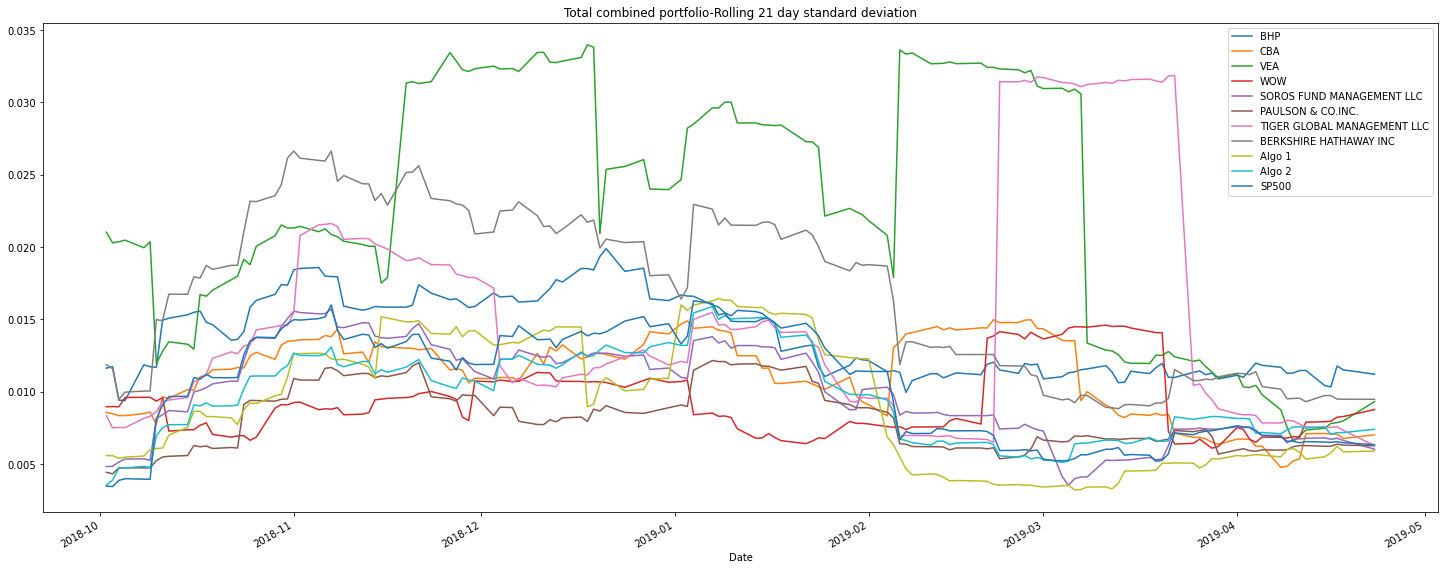

In [40]:
# Calculate and plot rolling std deviation with 21 day window
roll21stats_total = total_portfolio.rolling(window = 21).std()
roll21stats_total.tail(25)# to reconfirm
#plot the rolling std deviation
roll21stats_total.plot(figsize = (25,10), title = 'Total combined portfolio-Rolling 21 day standard deviation')

In [42]:
#13. Compare performance of total combined portfolio 
# Calculate the corelation for total combined portfolio
total_portfolio_cor = total_portfolio.corr()
total_portfolio_cor.head(11)
#Note: Based on below it can be said that S & P 500 and Algo2 have the highest co-relation

,BHP,CBA,VEA,WOW,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
BHP,1.000000,0.243851,0.096281,0.082634,0.032341,0.105450,0.048816,0.060374,0.065328,0.097950,0.109266
CBA,0.243851,1.000000,0.317132,0.480384,0.054368,0.045433,0.055413,0.031280,0.009711,0.068663,0.068926
VEA,0.096281,0.317132,1.000000,0.168101,0.064112,0.034975,0.028096,0.032797,0.048565,0.082283,0.024772
WOW,0.082634,0.480384,0.168101,1.000000,0.012089,0.045920,-0.003083,-0.007883,0.001920,0.038901,0.007714
SOROS FUND MANAGEMENT LLC,0.032341,0.054368,0.064112,0.012089,1.000000,0.797449,0.465289,0.829993,0.349509,0.872500,0.881497
PAULSON & CO.INC.,0.105450,0.045433,0.034975,0.045920,0.797449,1.000000,0.463104,0.667046,0.404237,0.803970,0.768489
TIGER GLOBAL MANAGEMENT LLC,0.048816,0.055413,0.028096,-0.003083,0.465289,0.463104,1.000000,0.318793,0.142648,0.380119,0.467707
BERKSHIRE HATHAWAY INC,0.060374,0.031280,0.032797,-0.007883,0.829993,0.667046,0.318793,1.000000,0.351130,0.794941,0.858884
Algo 1,0.065328,0.009711,0.048565,0.001920,0.349509,0.404237,0.142648,0.351130,1.000000,0.407029,0.299789
Algo 2,0.097950,0.068663,0.082283,0.038901,0.872500,0.803970,0.380119,0.794941,0.407029,1.000000,0.889309


<AxesSubplot:title={'center':'Rolling 60 day Beta of BHP'}, xlabel='Date'>

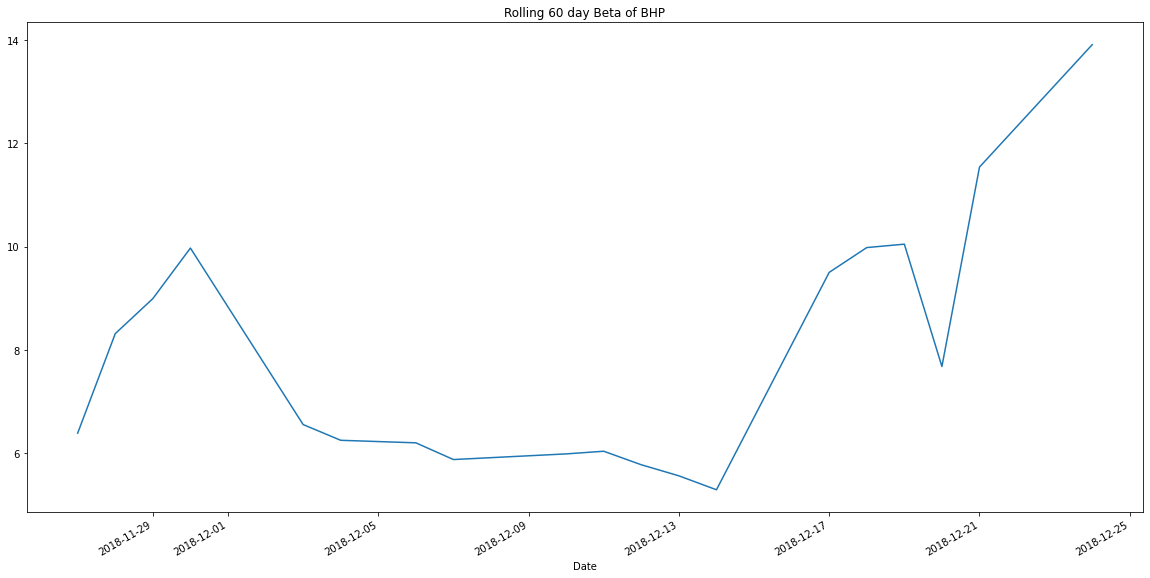

In [43]:
#Calculate and plot the 60 day rolling beta for BHP and the S & P 500 Beta= BHP covariance / S & P500 variance
covariance_BHP_60 = total_portfolio['BHP'].rolling(window = 60).cov(combinedret_df['SP500'])
variance__SP500_60 = total_portfolio['SP500'].rolling(window = 60).var()
beta_BHP_60 = variance__SP500_60/ covariance_BHP_60
beta_BHP_60.plot(figsize = (20,10), title = 'Rolling 60 day Beta of BHP')
#Note: BHP seems to be valatile as its Beta is > 1

In [44]:
# 14. Calculate annualised Sharpe ratios for total combined portfolio
total_portfolio_sharpe =total_portfolio.mean()*252/(total_portfolio.std()*np.sqrt(252))
total_portfolio_sharpe

BHP                            1.652754
CBA                            0.756414
VEA                            0.417977
WOW                            1.321887
SOROS FUND MANAGEMENT LLC     -0.071262
PAULSON & CO.INC.             -0.710345
TIGER GLOBAL MANAGEMENT LLC   -1.797496
BERKSHIRE HATHAWAY INC         0.041773
Algo 1                         2.580646
Algo 2                        -0.571088
SP500                         -0.214525
dtype: float64

<AxesSubplot:title={'center':'Total combined portfolio- Sharpe ratios'}>

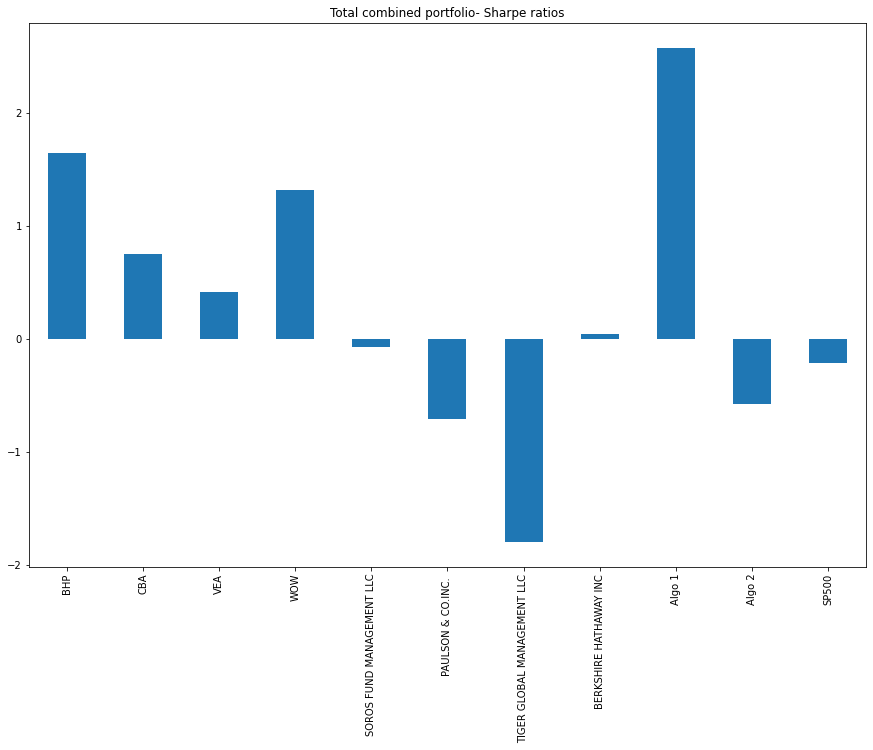

In [45]:
#plot sharpe ratios
total_portfolio_sharpe.plot(kind = 'bar', figsize = (15, 10), title = "Total combined portfolio- Sharpe ratios")
#Note: Algo2 is still the best performing ticker while my portfolio, over the assumed period, has definitely outperformed the other portfolios

In [ ]:
# THE END